<div style="background-color:#9dedde; padding: 15px">
<h2>Projet 7 : Implémentez un modèle de Scoring</h2>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# **Chargement des données**

In [2]:
df = pd.read_csv("D:\\Projet\\P07\\P07_Implementez_outils_scoring\\p7-ml\\fichier_ml\\app_train_sample.csv")

In [3]:
print("Shape:", df.shape)
print("Aperçu des données:")
df.head()

Shape: (30751, 122)
Aperçu des données:


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


# **Analyse de la struture du dataset**

In [4]:
print("\nInformations générales sur le dataset:")
df.info()
print("\nNombre de doublons:", df.duplicated().sum())


Informations générales sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30751 entries, 0 to 30750
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 28.6+ MB

Nombre de doublons: 0


# **Analyse des valeurs manquantes**

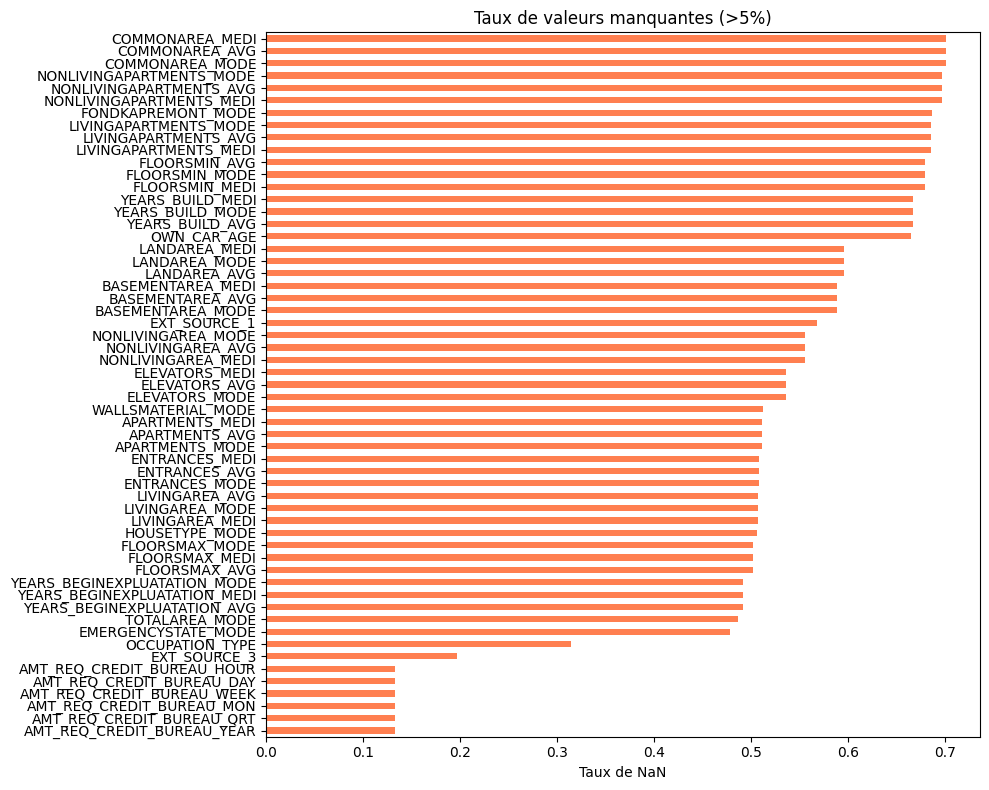

In [5]:
nan_percentages = df.isna().mean().sort_values(ascending=False)
nan_filtered = nan_percentages[nan_percentages > 0.05]

plt.figure(figsize=(10, 8))
nan_filtered.plot(kind="barh", color="coral")
plt.title("Taux de valeurs manquantes (>5%)")
plt.xlabel("Taux de NaN")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [6]:
col_to_drop = nan_percentages[nan_percentages > 0.30].index.tolist()
df.drop(columns=col_to_drop, inplace=True)
print(f"✅ Colonnes supprimées (>30% NaN) : {len(col_to_drop)}")

# 4.2 Suppression des doublons
duplicates = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"✅ Doublons supprimés : {duplicates}")

✅ Colonnes supprimées (>30% NaN) : 50
✅ Doublons supprimés : 0


# **SELECTION DES COLONNES**

In [7]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30746,311641,0,Cash loans,F,N,N,1,90000.0,808650.0,23773.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
30749,437079,0,Cash loans,F,N,Y,0,36000.0,270000.0,9828.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


In [8]:
df.columns.tolist()

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DA

In [9]:
colonnes_renommer = {
    "SK_ID_CURR": "ID_CLIENT",
    "TARGET": "CIBLE",
    "NAME_CONTRACT_TYPE": "TYPE_CONTRAT",
    "CODE_GENDER": "GENRE",
    "FLAG_OWN_CAR": "PROPRIETAIRE_VOITURE",
    "FLAG_OWN_REALTY": "PROPRIETAIRE_BIEN_IMMO",
    "CNT_CHILDREN": "NBR_ENFANTS",
    "AMT_INCOME_TOTAL": "REVENU_TOTAL",
    "AMT_CREDIT": "MONTANT_CREDIT",
    "AMT_ANNUITY": "MONTANT_ANNUITE",
    "AMT_GOODS_PRICE": "MONTANT_BIENS",
    "NAME_INCOME_TYPE": "TYPE_REVENUS",
    "NAME_EDUCATION_TYPE": "NIVEAU_EDUCATION",
    "NAME_FAMILY_STATUS": "STATUT_FAMILIAL",
    "NAME_HOUSING_TYPE": "TYPE_LOGEMENT",
    "DAYS_BIRTH": "JOURS_NAISSANCE",
    "DAYS_EMPLOYED": "JOURS_EMPLOI",
    "DAYS_REGISTRATION": "JOURS_ENREGISTREMENT",
    "DAYS_ID_PUBLISH": "JOURS_ID_PUBLICATION",
    "FLAG_MOBIL": "FLAG_MOBILE",
    "FLAG_EMP_PHONE": "FLAG_TELEPHONE_PRO",
    "FLAG_WORK_PHONE": "FLAG_TELEPHONE_TRAVAIL",
    "FLAG_PHONE": "FLAG_TELEPHONE",
    "FLAG_EMAIL": "FLAG_EMAIL",
    "CNT_FAM_MEMBERS": "NBR_MEMBRES_FAMILLE",
    "EXT_SOURCE_2": "SOURCE_EXTERNE_2",
    "DAYS_LAST_PHONE_CHANGE": "JOURS_DERNIER_CHANGEMENT_TEL",
    "ORGANIZATION_TYPE": "TYPE_ENTREPRISE",
    "HOUR_APPR_PROCESS_START": "HEURE_DEMANDE",
    "WEEKDAY_APPR_PROCESS_START": "JOUR_DEMANDE",
    "AMT_REQ_CREDIT_BUREAU_YEAR": "DEMANDES_CREDIT",
    "NAME_TYPE_SUITE": "ACCOMPAGNANT_DEMANDE"
}

In [10]:
df.rename(columns=colonnes_renommer, inplace=True)

In [11]:
col_to_keep = list(colonnes_renommer.values())
df = df.loc[:, col_to_keep]
print(f"✅ Colonnes conservées : {len(col_to_keep)}")
print(f"✅ Shape après sélection : {df.shape}")
df.head()

✅ Colonnes conservées : 32
✅ Shape après sélection : (30751, 32)


,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,FLAG_TELEPHONE,FLAG_EMAIL,NBR_MEMBRES_FAMILLE,SOURCE_EXTERNE_2,JOURS_DERNIER_CHANGEMENT_TEL,TYPE_ENTREPRISE,HEURE_DEMANDE,JOUR_DEMANDE,DEMANDES_CREDIT,ACCOMPAGNANT_DEMANDE
0,196888,0,Cash loans,F,N,Y,0,135000.0,1350000.0,39604.5,...,1,0,2.0,0.761443,-2532.0,Business Entity Type 3,13,FRIDAY,0.0,Unaccompanied
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,0,0,2.0,0.396825,-879.0,Business Entity Type 3,15,THURSDAY,1.0,Unaccompanied
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,0,0,1.0,0.385353,-565.0,Other,14,WEDNESDAY,NaN,Unaccompanied
3,396314,0,Cash loans,M,N,N,0,81000.0,218016.0,17352.0,...,0,0,2.0,0.545649,-1826.0,Government,15,SUNDAY,5.0,Unaccompanied
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,0,0,2.0,0.444443,-1504.0,Trade: type 3,8,SATURDAY,3.0,Unaccompanied


In [12]:
df.columns.tolist()

['ID_CLIENT',
 'CIBLE',
 'TYPE_CONTRAT',
 'GENRE',
 'PROPRIETAIRE_VOITURE',
 'PROPRIETAIRE_BIEN_IMMO',
 'NBR_ENFANTS',
 'REVENU_TOTAL',
 'MONTANT_CREDIT',
 'MONTANT_ANNUITE',
 'MONTANT_BIENS',
 'TYPE_REVENUS',
 'NIVEAU_EDUCATION',
 'STATUT_FAMILIAL',
 'TYPE_LOGEMENT',
 'JOURS_NAISSANCE',
 'JOURS_EMPLOI',
 'JOURS_ENREGISTREMENT',
 'JOURS_ID_PUBLICATION',
 'FLAG_MOBILE',
 'FLAG_TELEPHONE_PRO',
 'FLAG_TELEPHONE_TRAVAIL',
 'FLAG_TELEPHONE',
 'FLAG_EMAIL',
 'NBR_MEMBRES_FAMILLE',
 'SOURCE_EXTERNE_2',
 'JOURS_DERNIER_CHANGEMENT_TEL',
 'TYPE_ENTREPRISE',
 'HEURE_DEMANDE',
 'JOUR_DEMANDE',
 'DEMANDES_CREDIT',
 'ACCOMPAGNANT_DEMANDE']

# **Feature Engineering**

In [13]:
if "AGE" not in df.columns:
    df["AGE"] = (-df["JOURS_NAISSANCE"] / 365).round().astype(int)

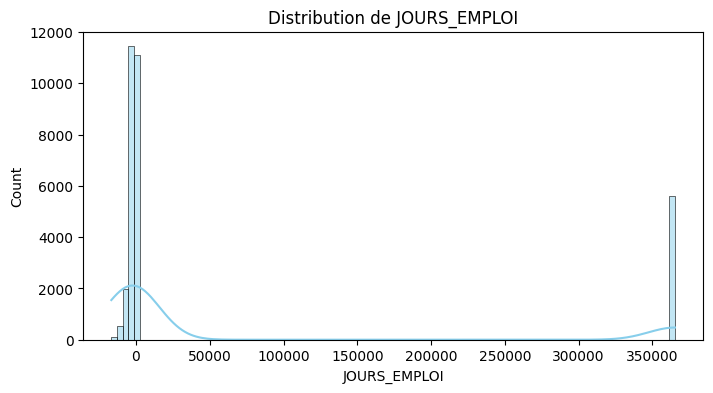

In [14]:
if 'JOURS_EMPLOI' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['JOURS_EMPLOI'], bins=100, kde=True, color="skyblue")
    plt.title("Distribution de JOURS_EMPLOI")
    plt.show()

In [15]:
df["JOURS_EMPLOI"] = df["JOURS_EMPLOI"].replace(365243, np.nan)
df["ANNEES_EMPLOI"] = (-df["JOURS_EMPLOI"] / 365).round().astype('Int64')

In [16]:
if 'JOURS_NAISSANCE' in df.columns:
    df['AGE'] = (-df['JOURS_NAISSANCE'] / 365).round(1)

In [17]:
# Suppression colonnes inutiles après transformation
df.drop(columns=["JOURS_NAISSANCE", "JOURS_EMPLOI"], inplace=True)

In [18]:
anomalies = df[df["ANNEES_EMPLOI"] >= df["AGE"]]
print(f"⚠️ Nombre d'anomalies Années emploi >= Âge : {len(anomalies)}")

⚠️ Nombre d'anomalies Années emploi >= Âge : 0


In [19]:
#Plus le client dispose de moyens de communication plus il est suivable. 
df["SCORE_CONTACT"] = df[["FLAG_TELEPHONE", "FLAG_TELEPHONE_PRO", "FLAG_TELEPHONE_TRAVAIL", "FLAG_EMAIL"]].sum(axis=1)

In [20]:
df['SCORE_CONTACT'].unique()

array([3, 1, 2, 0, 4], dtype=int64)

In [21]:
#Ratio des charges familiales
df["RATIO_ENFANTS_FAMILLE"] = df["NBR_ENFANTS"] / df["NBR_MEMBRES_FAMILLE"]
df["RATIO_ENFANTS_FAMILLE"] = df["RATIO_ENFANTS_FAMILLE"].replace([np.inf, -np.inf], 0).fillna(0)

In [22]:
df["RATIO_ENFANTS_FAMILLE"]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
           ...   
30746    0.333333
30747    0.000000
30748    0.000000
30749    0.000000
30750    0.000000
Name: RATIO_ENFANTS_FAMILLE, Length: 30751, dtype: float64

In [23]:
df["DUREE_CREDIT_MOIS"] = (df["MONTANT_CREDIT"] / df["MONTANT_ANNUITE"]).round()

In [24]:
#En entreprise on estime qu'un délai long pour le traitement d'un dossier peut signifier un dossier à risque (clients peu fiables : doc manquants, cas complexes...)
df["DELAI_TRAITEMENT_DOSSIER"] = df["JOURS_ENREGISTREMENT"] - df["JOURS_ID_PUBLICATION"]

In [25]:
df["DELAI_TRAITEMENT_DOSSIER"]

0       -9083.0
1        2343.0
2          87.0
3       -1497.0
4        3806.0
          ...  
30746   -2984.0
30747       7.0
30748    1482.0
30749       0.0
30750   -8386.0
Name: DELAI_TRAITEMENT_DOSSIER, Length: 30751, dtype: float64

In [26]:
df = df[df["DELAI_TRAITEMENT_DOSSIER"] >= 0]


In [27]:
df["TRAITEMENT_DOSSIER_GROUPE"] = pd.cut(
    df["DELAI_TRAITEMENT_DOSSIER"],
    bins=[-1, 15, 30, 60, 120, np.inf],
    labels=["<15j", "15-30j", "30-60j", "60-120j", "120j+"]
)
df["TRAITEMENT_DOSSIER_GROUPE"]

1          120j+
2        60-120j
4          120j+
13         120j+
20         120j+
          ...   
30735      120j+
30743      120j+
30747       <15j
30748      120j+
30749       <15j
Name: TRAITEMENT_DOSSIER_GROUPE, Length: 11078, dtype: category
Categories (5, object): ['<15j' < '15-30j' < '30-60j' < '60-120j' < '120j+']

In [28]:
df["TRAITEMENT_DOSSIER_SIMPLIFIE"] = df["TRAITEMENT_DOSSIER_GROUPE"].replace({
    "<15j": "Court",
    "15-30j": "Standard",
    "30-60j": "Standard",
    "60-120j": "Long",
    "120j+": "Long"
})


C:\Users\acer6\AppData\Local\Temp\ipykernel_3252\3585320566.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df["TRAITEMENT_DOSSIER_SIMPLIFIE"] = df["TRAITEMENT_DOSSIER_GROUPE"].replace({


In [29]:
print(f"✅ Shape après Feature Engineering : {df.shape}")
df.head()

✅ Shape après Feature Engineering : (11078, 38)


,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,DEMANDES_CREDIT,ACCOMPAGNANT_DEMANDE,AGE,ANNEES_EMPLOI,SCORE_CONTACT,RATIO_ENFANTS_FAMILLE,DUREE_CREDIT_MOIS,DELAI_TRAITEMENT_DOSSIER,TRAITEMENT_DOSSIER_GROUPE,TRAITEMENT_DOSSIER_SIMPLIFIE
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,1.0,Unaccompanied,54.3,2,1,0.000000,23.0,2343.0,120j+,Long
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,NaN,Unaccompanied,25.2,2,2,0.000000,15.0,87.0,60-120j,Long
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,3.0,Unaccompanied,44.0,0,1,0.000000,24.0,3806.0,120j+,Long
13,401501,0,Cash loans,M,Y,Y,1,180000.0,364896.0,31347.0,...,5.0,Unaccompanied,37.6,14,1,0.333333,12.0,1751.0,120j+,Long
20,341989,0,Revolving loans,F,N,Y,1,135000.0,405000.0,20250.0,...,3.0,Unaccompanied,31.5,4,1,0.333333,20.0,1782.0,120j+,Long


# **NaN & Duplicated**

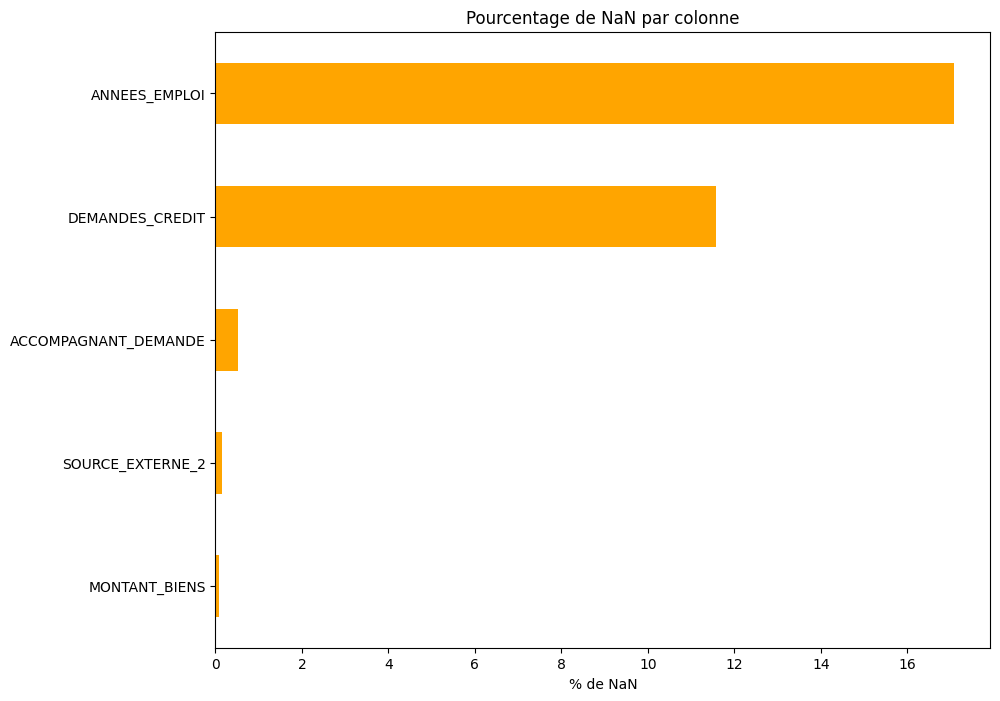

In [30]:
nan_percentages = df.isna().mean() * 100
plt.figure(figsize=(10, 8))
nan_percentages[nan_percentages > 0].sort_values().plot(kind="barh", color="orange")
plt.title("Pourcentage de NaN par colonne")
plt.xlabel("% de NaN")
plt.show()

In [31]:
df_nan_emploi = df[df["ANNEES_EMPLOI"].isna()].copy()


cols_interessantes = [
    "AGE", "ANNEES_EMPLOI", "REVENU_TOTAL",
    "TYPE_REVENUS", "TYPE_CONTRAT", "PROPRIETAIRE_BIEN_IMMO", "CIBLE"
]


display(df_nan_emploi[cols_interessantes].head(10))


print("Nombre de cas avec ANNEES_EMPLOI manquant :", len(df_nan_emploi))
print("Proportion dans l’ensemble :", round(len(df_nan_emploi) / len(df), 3))


print("\nRépartition par TYPE_REVENUS :")
print(df_nan_emploi["TYPE_REVENUS"].value_counts())


print("\nRépartition par CIBLE :")
print(df_nan_emploi["CIBLE"].value_counts(normalize=True))


,AGE,ANNEES_EMPLOI,REVENU_TOTAL,TYPE_REVENUS,TYPE_CONTRAT,PROPRIETAIRE_BIEN_IMMO,CIBLE
22,58.8,<NA>,135000.0,Pensioner,Cash loans,N,0
23,58.3,<NA>,135000.0,Pensioner,Cash loans,Y,0
24,60.7,<NA>,90000.0,Pensioner,Cash loans,Y,0
28,62.1,<NA>,112500.0,Pensioner,Cash loans,Y,0
43,64.7,<NA>,112500.0,Pensioner,Cash loans,Y,0
53,60.6,<NA>,72000.0,Pensioner,Cash loans,Y,0
100,66.5,<NA>,67500.0,Pensioner,Cash loans,Y,0
109,56.4,<NA>,121500.0,Pensioner,Cash loans,Y,1
122,57.7,<NA>,193500.0,Pensioner,Cash loans,Y,0
149,65.0,<NA>,225000.0,Pensioner,Cash loans,Y,0


Nombre de cas avec ANNEES_EMPLOI manquant : 1891
Proportion dans l’ensemble : 0.171

Répartition par TYPE_REVENUS :
TYPE_REVENUS
Pensioner     1889
Unemployed       2
Name: count, dtype: int64

Répartition par CIBLE :
CIBLE
0    0.947118
1    0.052882
Name: proportion, dtype: float64


In [32]:
# Vérification des NaN
df_nan_emploi = df[df["ANNEES_EMPLOI"].isna()]
print("Nombre de cas avec ANNEES_EMPLOI manquant :", len(df_nan_emploi))
print("Proportion dans l’ensemble :", round(len(df_nan_emploi) / len(df), 3))


Nombre de cas avec ANNEES_EMPLOI manquant : 1891
Proportion dans l’ensemble : 0.171


In [33]:
# Répartition par type de revenus
print("\nRépartition par TYPE_REVENUS :")
print(df_nan_emploi["TYPE_REVENUS"].value_counts())


Répartition par TYPE_REVENUS :
TYPE_REVENUS
Pensioner     1889
Unemployed       2
Name: count, dtype: int64


In [34]:
# Répartition par cible
print("\nRépartition par CIBLE :")
print(df_nan_emploi["CIBLE"].value_counts(normalize=True).rename("proportion"))



Répartition par CIBLE :
CIBLE
0    0.947118
1    0.052882
Name: proportion, dtype: float64


In [35]:
def type_exp_pro(row):
    if pd.isna(row["ANNEES_EMPLOI"]):
        return "Retraité"
    elif row["ANNEES_EMPLOI"] == 0:
        return "Sans emploi"
    elif row["ANNEES_EMPLOI"] < 5:
        return "Expérience Faible"
    elif row["ANNEES_EMPLOI"] < 15:
        return "Expérience Moyenne"
    else:
        return "Expérience Longue"

df["EMPLOI_TYPE"] = df.apply(type_exp_pro, axis=1)


In [36]:
df["EMPLOI_TYPE"] = df.apply(type_exp_pro, axis=1)


In [37]:

# Exception : les chômeurs n'ont pas d'emploi mais ne sont pas forcément retraités
df.loc[df["TYPE_REVENUS"] == "Unemployed", "EMPLOI_TYPE"] = "Sans emploi"


In [38]:


tableau_emploi = df.groupby("EMPLOI_TYPE", observed=True)["CIBLE"].agg(["mean", "count"]).reset_index()
tableau_emploi.rename(columns={"mean": "Taux défaut", "count": "Nombre de clients"}, inplace=True)
tableau_emploi["Taux défaut"] = tableau_emploi["Taux défaut"].round(3)*100

display(tableau_emploi.sort_values("Taux défaut", ascending=False))


,EMPLOI_TYPE,Taux défaut,Nombre de clients
4,Sans emploi,12.9,371
0,Expérience Faible,10.2,4342
2,Expérience Moyenne,7.1,3769
3,Retraité,5.2,1889
1,Expérience Longue,5.1,707


C:\Users\acer6\AppData\Local\Temp\ipykernel_3252\2678008085.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tableau_emploi_sorted,


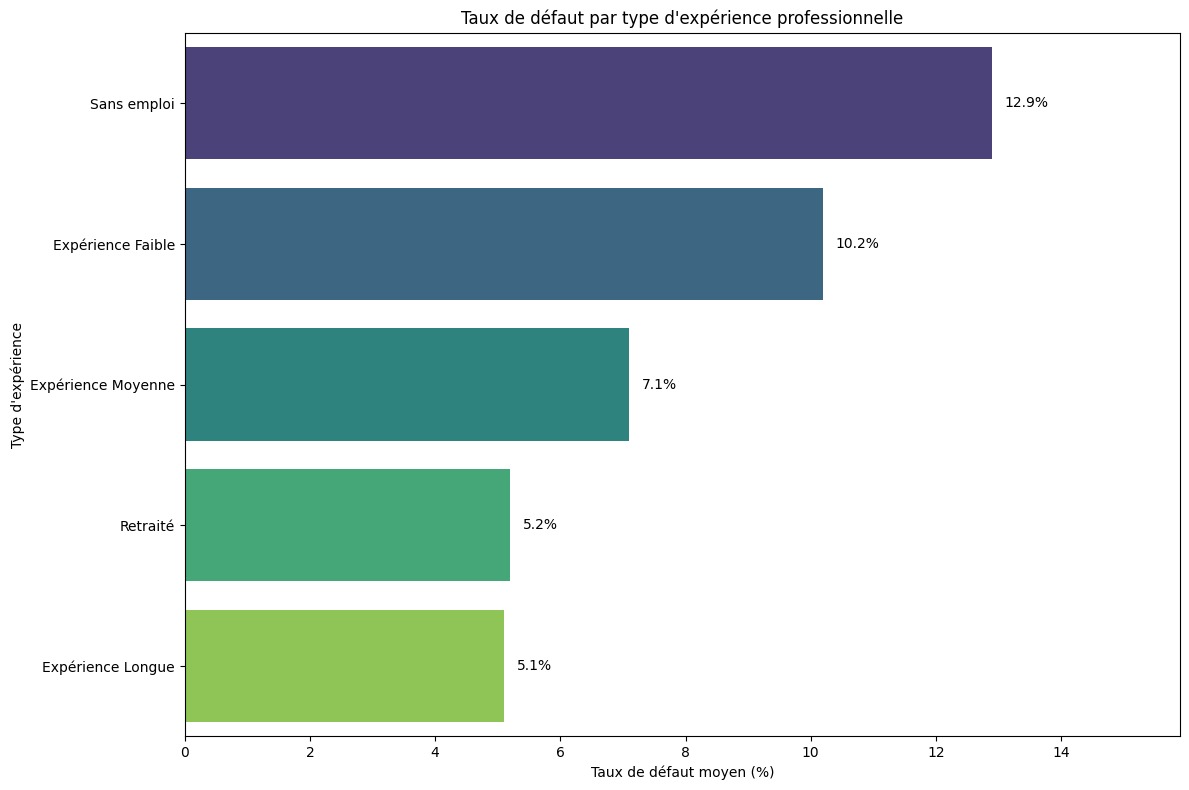

In [39]:

plt.figure(figsize=(12, 8))


tableau_emploi_sorted = tableau_emploi.sort_values("Taux défaut", ascending=False).reset_index(drop=True)


sns.barplot(data=tableau_emploi_sorted,
            x="Taux défaut", y="EMPLOI_TYPE",
            palette="viridis", legend=False)


for i, (taux_defaut, emploi) in enumerate(zip(tableau_emploi_sorted["Taux défaut"], tableau_emploi_sorted["EMPLOI_TYPE"])):
    plt.text(taux_defaut + 0.2, i, f"{taux_defaut:.1f}%", va="center", fontsize=10)

plt.title("Taux de défaut par type d'expérience professionnelle")
plt.xlabel("Taux de défaut moyen (%)")
plt.ylabel("Type d'expérience")
plt.xlim(0, tableau_emploi_sorted["Taux défaut"].max() + 3)

plt.tight_layout()
plt.show()


🧠 **Analyse métier : Type d'expérience professionnelle**

Nous avons créé une nouvelle variable `EMPLOI_TYPE` en regroupant les clients selon leur ancienneté professionnelle :

- **Sans emploi** : `ANNEES_EMPLOI` manquant (souvent des retraités ou chômeurs),
- **Expérience Faible** : < 3 ans,
- **Expérience Moyenne** : 3 à 10 ans,
- **Expérience Longue** : > 10 ans,
- **Retraité** : clients identifiés comme "Pensioner".

 👉 **Interprétation :**

- Les clients **sans emploi** ont le **taux de défaut le plus élevé** (12.9 %).
- Le risque diminue significativement avec l’expérience.
- Les **retraités** présentent un risque modéré, possiblement grâce à une pension stable.

✅ **Conclusion métier :** cette feature est pertinente pour la prédiction du risque de défaut, elle permet de distinguer clairement les profils à risque.


In [40]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,ACCOMPAGNANT_DEMANDE,AGE,ANNEES_EMPLOI,SCORE_CONTACT,RATIO_ENFANTS_FAMILLE,DUREE_CREDIT_MOIS,DELAI_TRAITEMENT_DOSSIER,TRAITEMENT_DOSSIER_GROUPE,TRAITEMENT_DOSSIER_SIMPLIFIE,EMPLOI_TYPE
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,Unaccompanied,54.3,2,1,0.000000,23.0,2343.0,120j+,Long,Expérience Faible
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,Unaccompanied,25.2,2,2,0.000000,15.0,87.0,60-120j,Long,Expérience Faible
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,Unaccompanied,44.0,0,1,0.000000,24.0,3806.0,120j+,Long,Sans emploi
13,401501,0,Cash loans,M,Y,Y,1,180000.0,364896.0,31347.0,...,Unaccompanied,37.6,14,1,0.333333,12.0,1751.0,120j+,Long,Expérience Moyenne
20,341989,0,Revolving loans,F,N,Y,1,135000.0,405000.0,20250.0,...,Unaccompanied,31.5,4,1,0.333333,20.0,1782.0,120j+,Long,Expérience Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30735,303340,0,Cash loans,F,N,N,1,225000.0,367389.0,16312.5,...,Family,43.0,4,1,0.333333,23.0,2849.0,120j+,Long,Expérience Faible
30743,150906,0,Cash loans,F,N,Y,0,103500.0,121500.0,9211.5,...,Unaccompanied,60.2,<NA>,1,0.000000,13.0,1857.0,120j+,Long,Retraité
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,Unaccompanied,37.8,20,3,0.000000,9.0,7.0,<15j,Court,Expérience Longue
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,Family,43.4,<NA>,0,0.000000,20.0,1482.0,120j+,Long,Retraité


In [41]:

# ================================
# ✅ Remplissage des valeurs NaN
# ================================

# On remplace par 0 car ce sont des retraités → plus en activité
df["ANNEES_EMPLOI"].fillna(0, inplace=True)


C:\Users\acer6\AppData\Local\Temp\ipykernel_3252\2806424891.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["ANNEES_EMPLOI"].fillna(0, inplace=True)


# Analyse Exploratoire

**Analyse de la cible**

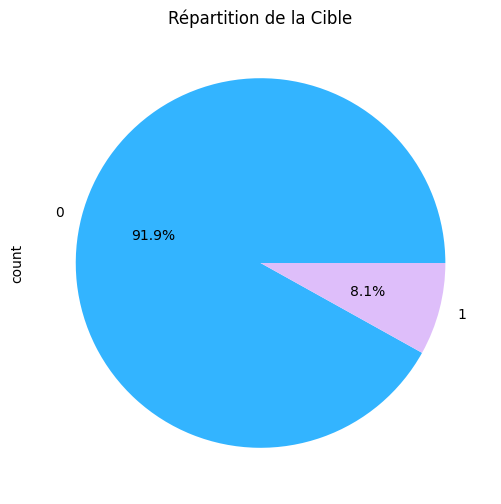

In [42]:
plt.figure(figsize=(6, 6))
df["CIBLE"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#33b4ff", "#debefa"])
plt.title("Répartition de la Cible")
plt.show()

In [43]:
correlations = df.corr(numeric_only=True)["CIBLE"].drop("CIBLE").sort_values(key=abs, ascending=False)
print("\nTop 5 des variables les plus corrélées à la Cible :")
print(correlations.head(5))


Top 5 des variables les plus corrélées à la Cible :
SOURCE_EXTERNE_2               -0.155058
AGE                            -0.071276
JOURS_ID_PUBLICATION            0.064717
JOURS_DERNIER_CHANGEMENT_TEL    0.056432
FLAG_TELEPHONE_PRO              0.046525
Name: CIBLE, dtype: float64


**Variables Numériques**

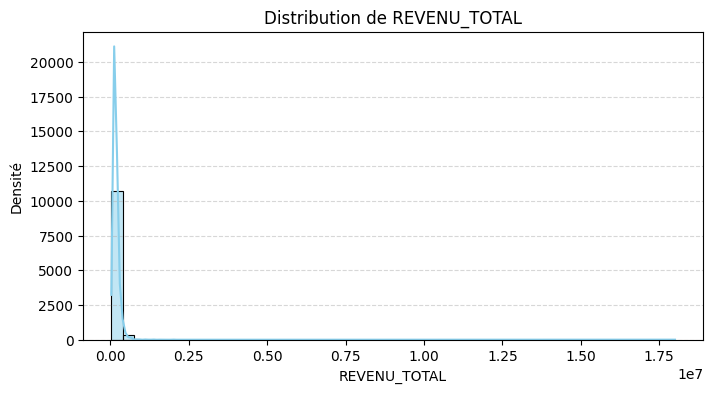

REVENU_TOTAL - Quantiles :
0.00       27000.0
0.01       45000.0
0.05       67500.0
0.95      360000.0
0.99      540000.0
1.00    18000090.0
Name: REVENU_TOTAL, dtype: float64

------------------------------------------------------------



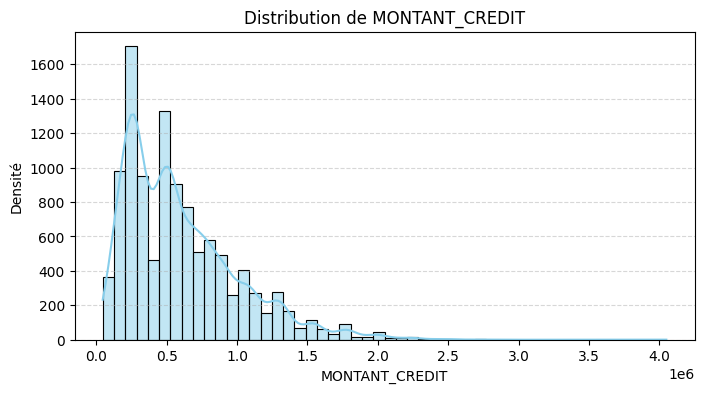

MONTANT_CREDIT - Quantiles :
0.00      45000.0
0.01      78192.0
0.05     137520.0
0.95    1350000.0
0.99    1886850.0
1.00    4050000.0
Name: MONTANT_CREDIT, dtype: float64

------------------------------------------------------------



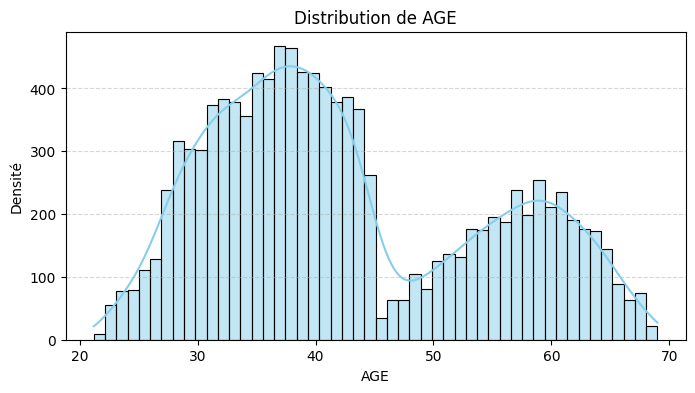

AGE - Quantiles :
0.00    21.2
0.01    23.7
0.05    27.4
0.95    63.3
0.99    66.8
1.00    69.0
Name: AGE, dtype: float64

------------------------------------------------------------



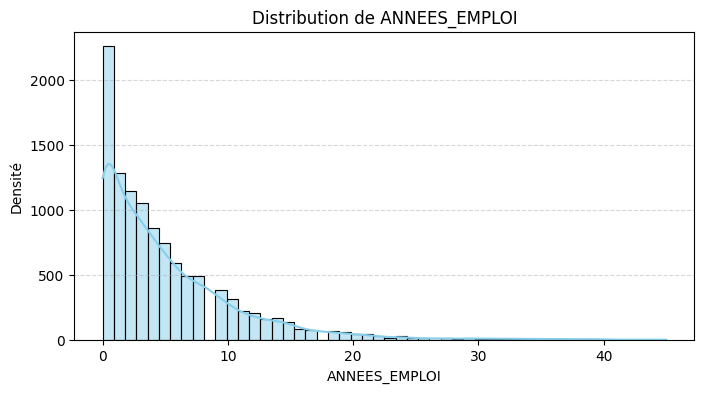

ANNEES_EMPLOI - Quantiles :
0.00     0.0
0.01     0.0
0.05     0.0
0.95    16.0
0.99    26.0
1.00    45.0
Name: ANNEES_EMPLOI, dtype: Float64

------------------------------------------------------------



In [44]:
variables = ["REVENU_TOTAL", "MONTANT_CREDIT", "AGE", "ANNEES_EMPLOI"]

for var in variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=var, kde=True, bins=50, color="skyblue")
    plt.title(f"Distribution de {var}")
    plt.xlabel(var)
    plt.ylabel("Densité")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.show()

    print(f"{var} - Quantiles :")
    print(df[var].quantile([0, 0.01, 0.05, 0.95, 0.99, 1]))
    print("\n" + "-"*60 + "\n")


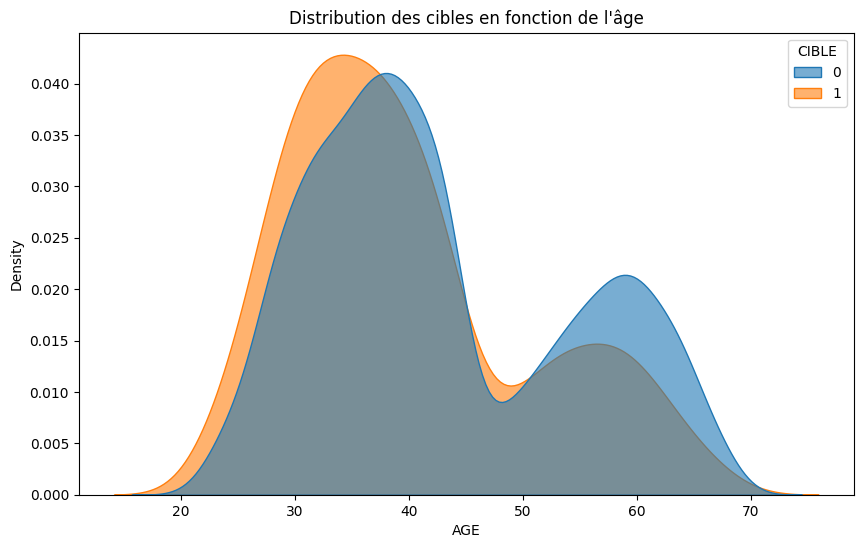

In [45]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x="AGE", hue="CIBLE", fill=True, common_norm=False, alpha=0.6)
plt.title("Distribution des cibles en fonction de l'âge")
plt.show()

C:\Users\acer6\AppData\Local\Temp\ipykernel_3252\2714727790.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


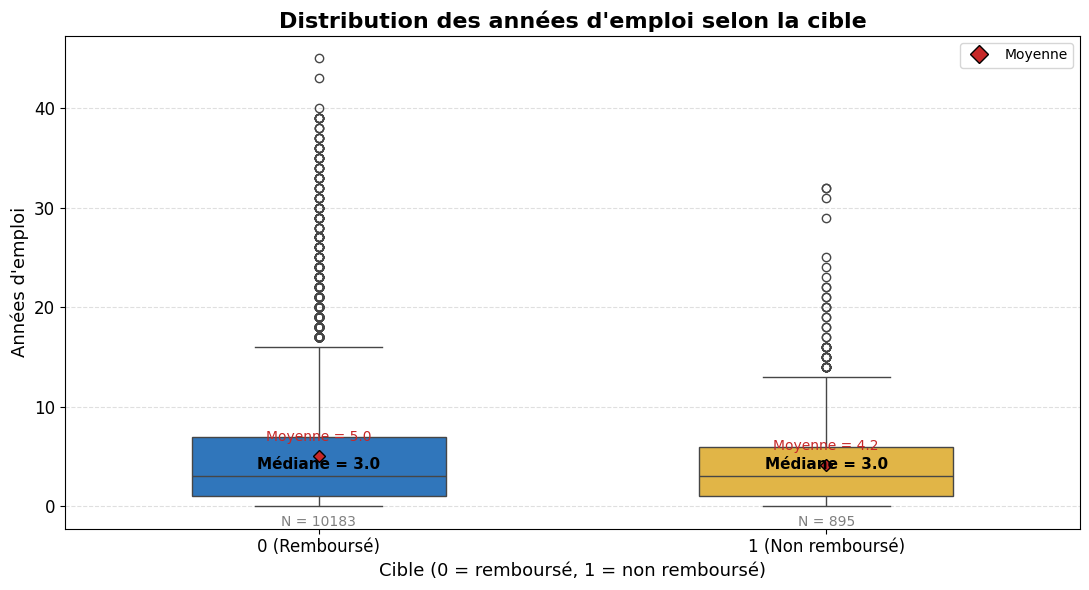

In [46]:
plt.figure(figsize=(11, 6))
palette = ["#1976D2", "#FBC02D"]

# Boxplot amélioré
ax = sns.boxplot(
    data=df,
    x="CIBLE",
    y="ANNEES_EMPLOI",
    palette=palette,
    width=0.5,
    showmeans=True,
    meanprops={"marker":"D", "markerfacecolor":"#C62828", "markeredgecolor":"black"}
)

# Stats à annoter
medians = df.groupby("CIBLE")["ANNEES_EMPLOI"].median().values
means = df.groupby("CIBLE")["ANNEES_EMPLOI"].mean().values
counts = df["CIBLE"].value_counts().sort_index().values

# Annoter médiane, moyenne et effectif sous la box
for i, (median, mean, count) in enumerate(zip(medians, means, counts)):
    ax.text(i, median+0.7, f"Médiane = {median:.1f}", ha="center", color="black", fontsize=11, fontweight="bold")
    ax.text(i, mean+1.5, f"Moyenne = {mean:.1f}", ha="center", color="#C62828", fontsize=10)
    ax.text(i, -2, f"N = {count}", ha="center", color="gray", fontsize=10)

plt.title("Distribution des années d'emploi selon la cible", fontsize=16, fontweight='bold')
plt.xlabel("Cible (0 = remboursé, 1 = non remboursé)", fontsize=13)
plt.ylabel("Années d'emploi", fontsize=13)
plt.xticks([0, 1], ["0 (Remboursé)", "1 (Non remboursé)"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Légende pour la moyenne
mean_legend = Line2D([0], [0], marker='D', color='w', label='Moyenne', markerfacecolor='#C62828', markeredgecolor='black', markersize=9)
plt.legend(handles=[mean_legend], loc='upper right')

plt.tight_layout()
plt.show()

In [47]:
print("\nStatistiques descriptives des variables numériques :")
display(df.describe().T)


Statistiques descriptives des variables numériques :


,count,mean,std,min,25%,50%,75%,max
ID_CLIENT,11078.0,278029.358097,103077.775793,100069.0,188257.5,278330.5,366130.25,456173.0
CIBLE,11078.0,0.080791,0.272526,0.0,0.0,0.0,0.0,1.0
NBR_ENFANTS,11078.0,0.552807,0.819253,0.0,0.0,0.0,1.0,12.0
REVENU_TOTAL,11078.0,175172.798249,198574.451958,27000.0,112500.0,157500.0,211500.0,18000090.0
MONTANT_CREDIT,11078.0,601077.060796,405123.665838,45000.0,270000.0,512338.5,808650.0,4050000.0
MONTANT_ANNUITE,11078.0,27596.899937,14823.32484,2052.0,16713.0,25258.5,35316.0,225000.0
MONTANT_BIENS,11069.0,542237.96314,374728.827403,45000.0,238500.0,450000.0,679500.0,4050000.0
JOURS_ENREGISTREMENT,11078.0,-1791.958567,1365.06619,-6204.0,-2774.0,-1469.0,-650.0,0.0
JOURS_ID_PUBLICATION,11078.0,-3534.356382,1287.414753,-6551.0,-4514.0,-3967.5,-2630.0,-16.0
FLAG_MOBILE,11078.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


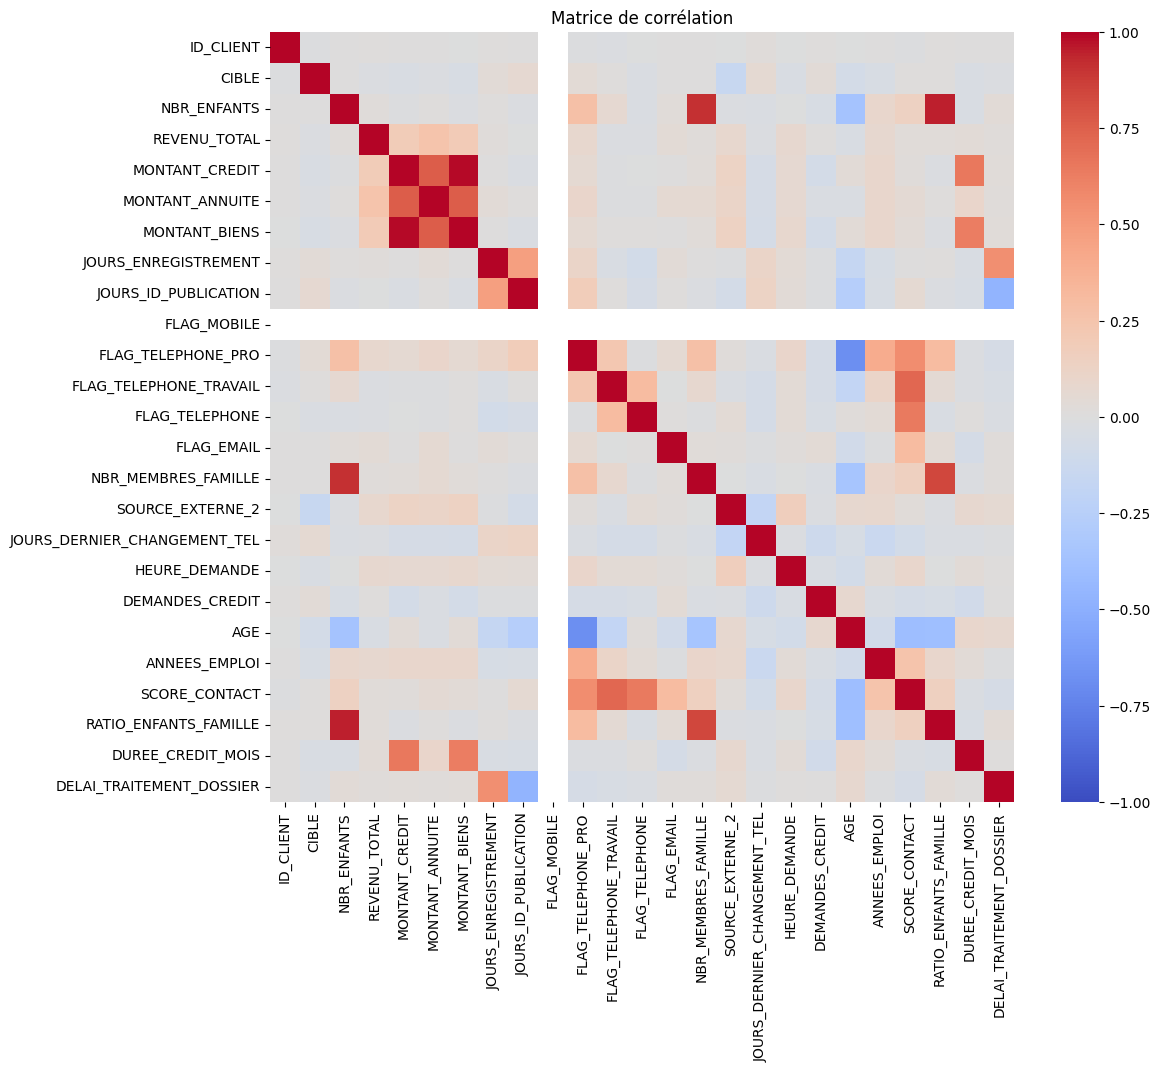

In [48]:
numeric_columns = df.select_dtypes(include=np.number)
plt.figure(figsize=(12, 10))
corr = numeric_columns.corr()
sns.heatmap(corr, annot=False, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matrice de corrélation")
plt.show()

**Variables catégorielles**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11078 entries, 1 to 30749
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   ID_CLIENT                     11078 non-null  int64   
 1   CIBLE                         11078 non-null  int64   
 2   TYPE_CONTRAT                  11078 non-null  object  
 3   GENRE                         11078 non-null  object  
 4   PROPRIETAIRE_VOITURE          11078 non-null  object  
 5   PROPRIETAIRE_BIEN_IMMO        11078 non-null  object  
 6   NBR_ENFANTS                   11078 non-null  int64   
 7   REVENU_TOTAL                  11078 non-null  float64 
 8   MONTANT_CREDIT                11078 non-null  float64 
 9   MONTANT_ANNUITE               11078 non-null  float64 
 10  MONTANT_BIENS                 11069 non-null  float64 
 11  TYPE_REVENUS                  11078 non-null  object  
 12  NIVEAU_EDUCATION              11078 non-null  objec

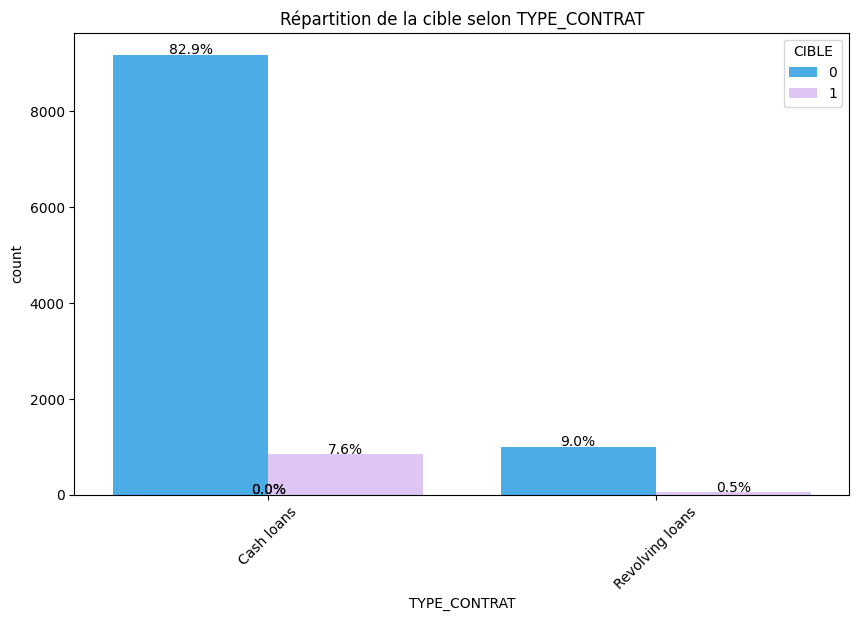

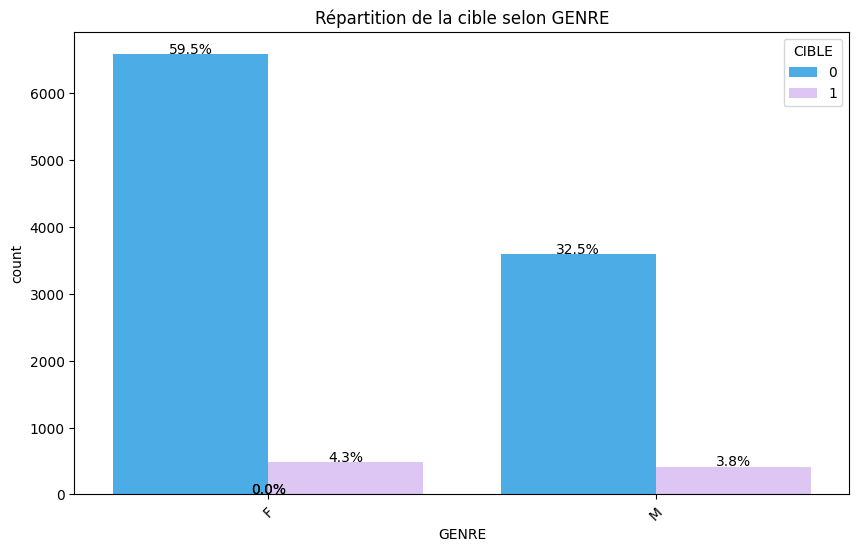

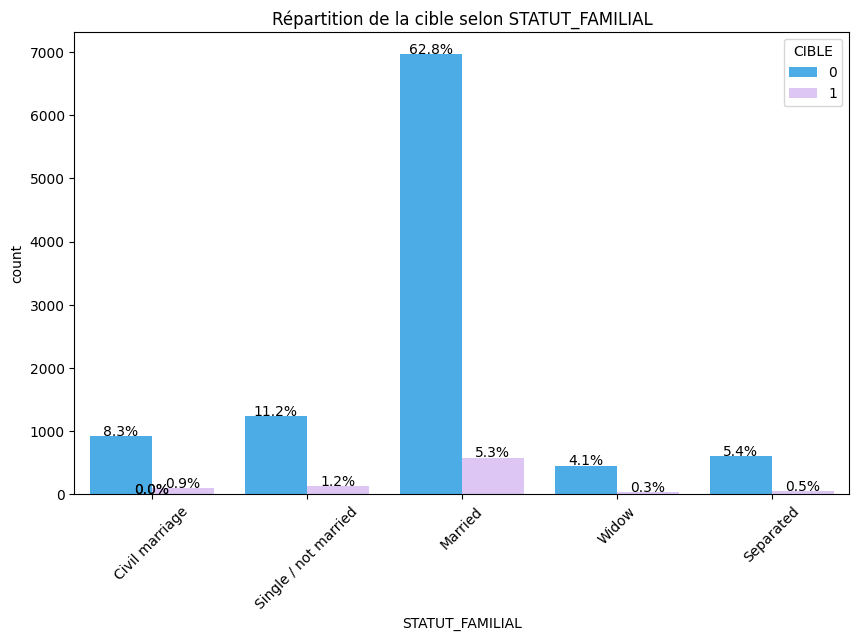

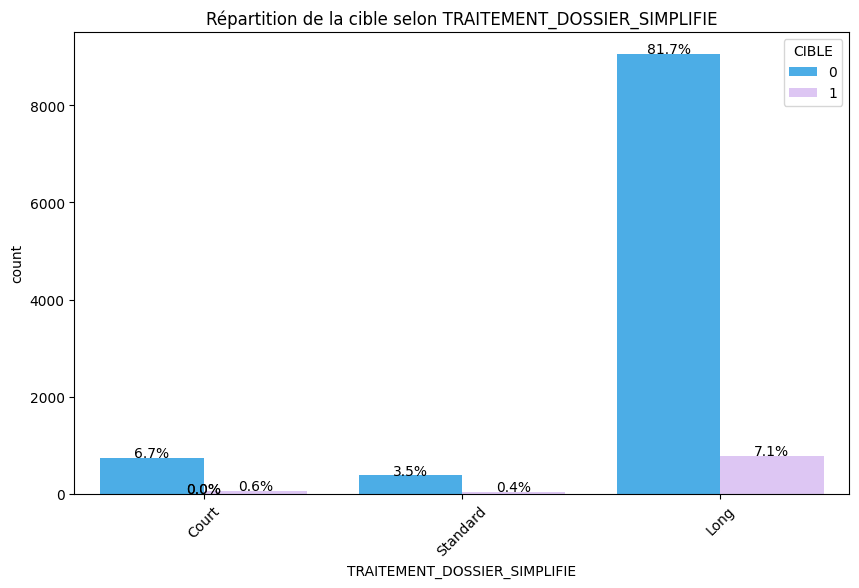

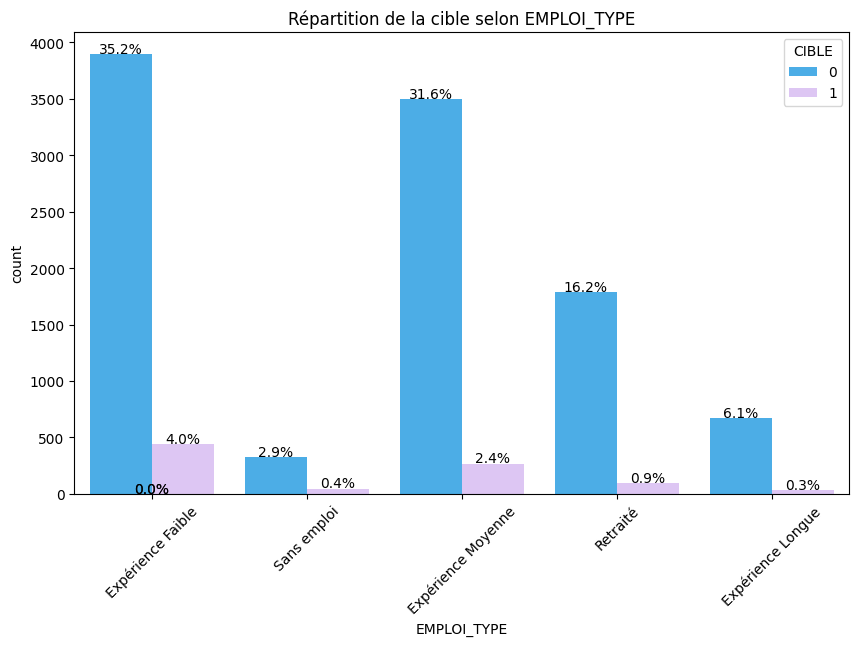

In [50]:
cat_vars = ["TYPE_CONTRAT", "GENRE", "STATUT_FAMILIAL", "TRAITEMENT_DOSSIER_SIMPLIFIE", "EMPLOI_TYPE"]

for var in cat_vars:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=var, hue="CIBLE", palette=["#33b4ff", "#debefa"])
    plt.title(f"Répartition de la cible selon {var}")
    plt.xticks(rotation=45)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2.0,
            height + 10,
            f"{100 * height / total:.1f}%",
            ha="center"
        )
    plt.show()

**Analyse des NaN restants**

In [51]:
nan_percent = df.isna().mean().sort_values(ascending=False)
nan_restants = nan_percent[nan_percent > 0].round(3)

print("\nPourcentage de NaN restants :")
print(nan_restants)


Pourcentage de NaN restants :
DEMANDES_CREDIT         0.116
ACCOMPAGNANT_DEMANDE    0.005
SOURCE_EXTERNE_2        0.002
MONTANT_BIENS           0.001
dtype: float64


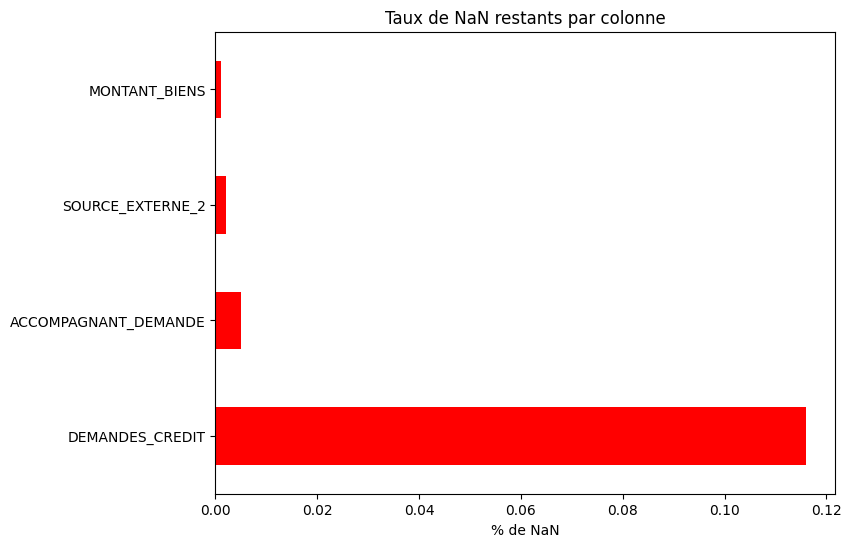

In [52]:
plt.figure(figsize=(8, 6))
nan_restants[nan_restants > 0].plot(kind="barh", color="red")
plt.title("Taux de NaN restants par colonne")
plt.xlabel("% de NaN")
plt.show()

# **Sélection des colonnes finales**

In [53]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['ID_CLIENT', 'CIBLE', 'TYPE_CONTRAT', 'GENRE', 'PROPRIETAIRE_VOITURE',
       'PROPRIETAIRE_BIEN_IMMO', 'NBR_ENFANTS', 'REVENU_TOTAL',
       'MONTANT_CREDIT', 'MONTANT_ANNUITE', 'MONTANT_BIENS', 'TYPE_REVENUS',
       'NIVEAU_EDUCATION', 'STATUT_FAMILIAL', 'TYPE_LOGEMENT',
       'JOURS_ENREGISTREMENT', 'JOURS_ID_PUBLICATION', 'FLAG_MOBILE',
       'FLAG_TELEPHONE_PRO', 'FLAG_TELEPHONE_TRAVAIL', 'FLAG_TELEPHONE',
       'FLAG_EMAIL', 'NBR_MEMBRES_FAMILLE', 'SOURCE_EXTERNE_2',
       'JOURS_DERNIER_CHANGEMENT_TEL', 'TYPE_ENTREPRISE', 'HEURE_DEMANDE',
       'JOUR_DEMANDE', 'DEMANDES_CREDIT', 'ACCOMPAGNANT_DEMANDE', 'AGE',
       'ANNEES_EMPLOI', 'SCORE_CONTACT', 'RATIO_ENFANTS_FAMILLE',
       'DUREE_CREDIT_MOIS', 'DELAI_TRAITEMENT_DOSSIER',
       'TRAITEMENT_DOSSIER_GROUPE', 'TRAITEMENT_DOSSIER_SIMPLIFIE',
       'EMPLOI_TYPE'],
      dtype='object')>

In [54]:
features_num = [
    'REVENU_TOTAL',        
    'MONTANT_CREDIT',      
    'AGE',                 
    'ANNEES_EMPLOI',       
    'SCORE_CONTACT',       
    'RATIO_ENFANTS_FAMILLE',  
    'DUREE_CREDIT_MOIS',   
    'DELAI_TRAITEMENT_DOSSIER', 'DEMANDES_CREDIT' 
]


features_cat = [
    'TYPE_CONTRAT',
    'GENRE',
    'STATUT_FAMILIAL',
    'TRAITEMENT_DOSSIER_SIMPLIFIE',
    'EMPLOI_TYPE', 'TYPE_LOGEMENT', 'ACCOMPAGNANT_DEMANDE'
]


t_features = features_num + features_cat
print(f"Features numériques retenues : {features_num}")
print(f"Features catégorielles retenues : {features_cat}")
print(f"Total features finales : {t_features}")

Features numériques retenues : ['REVENU_TOTAL', 'MONTANT_CREDIT', 'AGE', 'ANNEES_EMPLOI', 'SCORE_CONTACT', 'RATIO_ENFANTS_FAMILLE', 'DUREE_CREDIT_MOIS', 'DELAI_TRAITEMENT_DOSSIER', 'DEMANDES_CREDIT']
Features catégorielles retenues : ['TYPE_CONTRAT', 'GENRE', 'STATUT_FAMILIAL', 'TRAITEMENT_DOSSIER_SIMPLIFIE', 'EMPLOI_TYPE', 'TYPE_LOGEMENT', 'ACCOMPAGNANT_DEMANDE']
Total features finales : ['REVENU_TOTAL', 'MONTANT_CREDIT', 'AGE', 'ANNEES_EMPLOI', 'SCORE_CONTACT', 'RATIO_ENFANTS_FAMILLE', 'DUREE_CREDIT_MOIS', 'DELAI_TRAITEMENT_DOSSIER', 'DEMANDES_CREDIT', 'TYPE_CONTRAT', 'GENRE', 'STATUT_FAMILIAL', 'TRAITEMENT_DOSSIER_SIMPLIFIE', 'EMPLOI_TYPE', 'TYPE_LOGEMENT', 'ACCOMPAGNANT_DEMANDE']


In [55]:
df.isna().sum()

ID_CLIENT                          0
CIBLE                              0
TYPE_CONTRAT                       0
GENRE                              0
PROPRIETAIRE_VOITURE               0
PROPRIETAIRE_BIEN_IMMO             0
NBR_ENFANTS                        0
REVENU_TOTAL                       0
MONTANT_CREDIT                     0
MONTANT_ANNUITE                    0
MONTANT_BIENS                      9
TYPE_REVENUS                       0
NIVEAU_EDUCATION                   0
STATUT_FAMILIAL                    0
TYPE_LOGEMENT                      0
JOURS_ENREGISTREMENT               0
JOURS_ID_PUBLICATION               0
FLAG_MOBILE                        0
FLAG_TELEPHONE_PRO                 0
FLAG_TELEPHONE_TRAVAIL             0
FLAG_TELEPHONE                     0
FLAG_EMAIL                         0
NBR_MEMBRES_FAMILLE                0
SOURCE_EXTERNE_2                  17
JOURS_DERNIER_CHANGEMENT_TEL       0
TYPE_ENTREPRISE                    0
HEURE_DEMANDE                      0
J

In [56]:
cols_num_nan = ['MONTANT_BIENS','SOURCE_EXTERNE_2','DEMANDES_CREDIT']
df[cols_num_nan] = df[cols_num_nan].fillna(df[cols_num_nan].median())
# Éviter le chained assignment warning
df['ACCOMPAGNANT_DEMANDE'] = df['ACCOMPAGNANT_DEMANDE'].fillna('Inconnu')

# Vérification post-imputation
print(df[cols_num_nan + ['ACCOMPAGNANT_DEMANDE']].isna().sum())

MONTANT_BIENS           0
SOURCE_EXTERNE_2        0
DEMANDES_CREDIT         0
ACCOMPAGNANT_DEMANDE    0
dtype: int64


In [57]:
df

,ID_CLIENT,CIBLE,TYPE_CONTRAT,GENRE,PROPRIETAIRE_VOITURE,PROPRIETAIRE_BIEN_IMMO,NBR_ENFANTS,REVENU_TOTAL,MONTANT_CREDIT,MONTANT_ANNUITE,...,ACCOMPAGNANT_DEMANDE,AGE,ANNEES_EMPLOI,SCORE_CONTACT,RATIO_ENFANTS_FAMILLE,DUREE_CREDIT_MOIS,DELAI_TRAITEMENT_DOSSIER,TRAITEMENT_DOSSIER_GROUPE,TRAITEMENT_DOSSIER_SIMPLIFIE,EMPLOI_TYPE
1,101392,0,Cash loans,F,Y,Y,0,81000.0,573628.5,24435.0,...,Unaccompanied,54.3,2,1,0.000000,23.0,2343.0,120j+,Long,Expérience Faible
2,435135,0,Cash loans,F,N,N,0,112500.0,298512.0,19948.5,...,Unaccompanied,25.2,2,2,0.000000,15.0,87.0,60-120j,Long,Expérience Faible
4,341153,1,Cash loans,F,N,Y,0,90000.0,1006920.0,42790.5,...,Unaccompanied,44.0,0,1,0.000000,24.0,3806.0,120j+,Long,Sans emploi
13,401501,0,Cash loans,M,Y,Y,1,180000.0,364896.0,31347.0,...,Unaccompanied,37.6,14,1,0.333333,12.0,1751.0,120j+,Long,Expérience Moyenne
20,341989,0,Revolving loans,F,N,Y,1,135000.0,405000.0,20250.0,...,Unaccompanied,31.5,4,1,0.333333,20.0,1782.0,120j+,Long,Expérience Faible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30735,303340,0,Cash loans,F,N,N,1,225000.0,367389.0,16312.5,...,Family,43.0,4,1,0.333333,23.0,2849.0,120j+,Long,Expérience Faible
30743,150906,0,Cash loans,F,N,Y,0,103500.0,121500.0,9211.5,...,Unaccompanied,60.2,0,1,0.000000,13.0,1857.0,120j+,Long,Retraité
30747,151728,1,Cash loans,M,N,Y,0,40500.0,85500.0,9108.0,...,Unaccompanied,37.8,20,3,0.000000,9.0,7.0,<15j,Court,Expérience Longue
30748,384640,0,Revolving loans,F,Y,Y,0,69750.0,247500.0,12375.0,...,Family,43.4,0,0,0.000000,20.0,1482.0,120j+,Long,Retraité


# **Export data**

In [58]:
df.to_csv("app_train_sample_clean.csv", index=False)
print("Fichier nettoyé exporté sous le nom 'app_train_sample_clean.csv'.")

Fichier nettoyé exporté sous le nom 'app_train_sample_clean.csv'.
